In [1]:
import numpy as np

class Sigmoid():
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(x))

class Affine():
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

class TwoLayerNet():
    def __init__(self, input_size, hidden_size, output_size):
        W1 = np.random.randn(input_size, hidden_size)
        b1 = np.random.randn(hidden_size)
        W2 = np.random.randn(hidden_size, output_size)
        b2 = np.random.randn(output_size)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        self.params = []

        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x


x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
s


array([[-1.54386289,  1.08955113, -2.18676906],
       [-1.27408328,  0.96221672, -2.04092224],
       [-2.54697358,  2.10241018, -2.68193211],
       [-1.86221027,  1.60457003, -2.20634757],
       [-1.96484052,  1.70647699, -2.25402755],
       [-2.61929656,  1.32200038, -3.30674168],
       [-1.86403776,  1.7937773 , -2.12095695],
       [-2.08229206,  1.83238891, -2.3146749 ],
       [-1.7736499 ,  1.92039365, -1.9515372 ],
       [-2.3096677 ,  1.23746883, -2.92831315]])

In [2]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W,  = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dy):
        W, = self.params
        dx = np.dot(dy, W.T)
        dW = np.dot(self.x.T, dy)
        # 使用省略号可以固定变量的内存地址
        self.grads[0][...] = dW
        return dx



In [9]:
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()

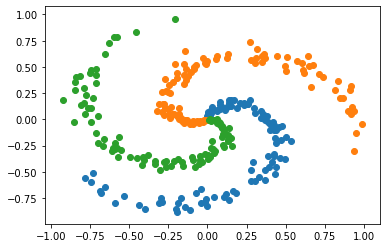

In [38]:
plt.scatter(x[:100,0],x[:100,1])
plt.scatter(x[101:200,0],x[101:200,1])
plt.scatter(x[201:,0],x[201:,1])

In [42]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        W1 = 0.01 * np.random.randn(input_size, hidden_size)
        b1 = np.zeros(hidden_size)
        W2 = 0.01 * np.random.randn(hidden_size, output_size)
        b2 = np.zeros(output_size)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        self.params = []
        self.grads = []

        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout = 1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout


from common.optimizer import SGD

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]


    for iters in range(max_iters):
        batch_x = x[iters * batch_size : (iters + 1) * batch_size]
        batch_t = t[iters * batch_size : (iters + 1) * batch_size]

        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        if (iters + 1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d | iter %d / %d | loss %.2f' % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch 1 | iter 10 / 10 | loss 1.14
| epoch 2 | iter 10 / 10 | loss 1.15
| epoch 3 | iter 10 / 10 | loss 1.18
| epoch 4 | iter 10 / 10 | loss 1.12
| epoch 5 | iter 10 / 10 | loss 1.14
| epoch 6 | iter 10 / 10 | loss 1.13
| epoch 7 | iter 10 / 10 | loss 1.15
| epoch 8 | iter 10 / 10 | loss 1.12
| epoch 9 | iter 10 / 10 | loss 1.16
| epoch 10 | iter 10 / 10 | loss 1.15
| epoch 11 | iter 10 / 10 | loss 1.12
| epoch 12 | iter 10 / 10 | loss 1.10
| epoch 13 | iter 10 / 10 | loss 1.06
| epoch 14 | iter 10 / 10 | loss 1.06
| epoch 15 | iter 10 / 10 | loss 1.00
| epoch 16 | iter 10 / 10 | loss 0.97
| epoch 17 | iter 10 / 10 | loss 0.93
| epoch 18 | iter 10 / 10 | loss 0.90
| epoch 19 | iter 10 / 10 | loss 0.91
| epoch 20 | iter 10 / 10 | loss 0.86
| epoch 21 | iter 10 / 10 | loss 0.83
| epoch 22 | iter 10 / 10 | loss 0.80
| epoch 23 | iter 10 / 10 | loss 0.81
| epoch 24 | iter 10 / 10 | loss 0.78
| epoch 25 | iter 10 / 10 | loss 0.79
| epoch 26 | iter 10 / 10 | loss 0.77
| epoch 27 | iter 10 

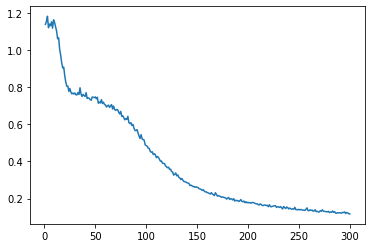

In [44]:
plt.plot(range(1, max_epoch + 1), loss_list)

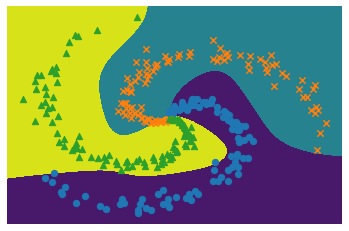

In [50]:
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 绘制数据点
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()